# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [12]:
charges_mean = np.mean(medical.charges)
charges_std = np.std(medical.charges,ddof=1)
charges_mean,charges_std,medical.charges.describe()

(13270.422265141257,
 12110.011236693994,
 count     1338.000000
 mean     13270.422265
 std      12110.011237
 min       1121.873900
 25%       4740.287150
 50%       9382.033000
 75%      16639.912515
 max      63770.428010
 Name: charges, dtype: float64)

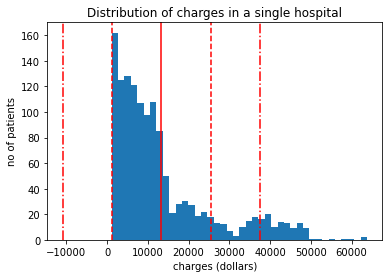

In [6]:

_=plt.hist(medical.charges,bins=40)
_=plt.xlabel("charges (dollars)")
_=plt.ylabel("no of patients")
_= plt.title('Distribution of charges in a single hospital')
_ = plt.axvline(charges_mean, color='r')
_ = plt.axvline(charges_mean+charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean-charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean+charges_std*2, color='r', linestyle='-.')
_ = plt.axvline(charges_mean-charges_std*2, color='r', linestyle='-.')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ As this is just one sample from the entire hospital population, it's mean will be different from that of a different sample. Our sample will vary from one sample to another so will our sample statistics. 

We should perform repeated draws(bootstrapping) and get a sampling distribution of mean(average). When size n of such samples increase , according to CLT , the distribution approaches a normal distribution irrespective of the underlying population distribution. From this we can make better estimates about the population mean.



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [95]:
medical.charges.sample(100,replace=True).describe()

count      100.000000
mean     15826.119922
std      14602.401982
min       1136.399400
25%       5745.276837
50%       9321.746775
75%      20692.408740
max      51194.559140
Name: charges, dtype: float64

In [186]:
bootstrap = pd.DataFrame({"mean_charges" : [np.mean(medical.charges.sample(1000,replace=True)) for i in range(10000)]})

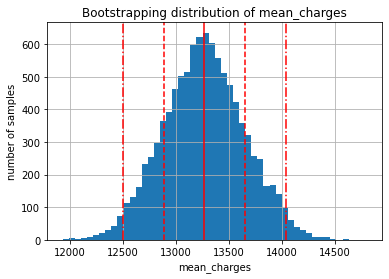

In [187]:
_ = bootstrap.mean_charges.hist(bins=50)
_ = plt.xlabel('mean_charges')
_ = plt.ylabel('number of samples')
_ = plt.title('Bootstrapping distribution of mean_charges')
bootstrap_mean = np.mean(bootstrap.mean_charges)
bootstrap_std = np.std(bootstrap.mean_charges)
plt.axvline(bootstrap_mean, color='r')
_ = plt.axvline(bootstrap_mean+bootstrap_std, color='r', linestyle='--')
_ = plt.axvline(bootstrap_mean-bootstrap_std, color='r', linestyle='--')
_ = plt.axvline(bootstrap_mean+bootstrap_std*2, color='r', linestyle='-.')
_ = plt.axvline(bootstrap_mean-bootstrap_std*2, color='r', linestyle='-.')

The null hypothesis here is the administrator's concern that the actual average charge has fallen below 12,000 . The confidence interval here should be 95% one-sided interval and the p-value here should be < 0.05 to reject the null hypothesis.

In [188]:
conf_int = t.ppf([0.05,1],df=999,loc=bootstrap_mean,scale=bootstrap_std)
conf_int

array([12636.91411282,            inf])

In [189]:
p_value = t.cdf(12000,df=999,loc=bootstrap_mean,scale=bootstrap_std)
p_value

0.0004858904387845558

Since the 95% confidence interval does not include 12000 the administrator need not be concerned.
Here we chose 999 as degrees of freedom as the sample size is 1000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We are performing the t-test on two idependent samples. The null hypothesis is that there is no difference in the means of the two groups and it is a two-tailed test.The alternate hypothesis is that there is a significant difference between the two means.

The assumption of variances is that the two samples have equal variance in charges(dependent variable)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [190]:
#btsp_ins = pd.DataFrame({"mean_charges" : [medical.loc[medical.insuranceclaim==1].charges.sample(500,replace=True).mean() for i in range(5000)]})
#btsp_no_ins = pd.DataFrame({"mean_charges" : [medical.loc[medical.insuranceclaim==0].charges.sample(500,replace=True).mean() for i in range(5000)]})
x0 = medical.loc[medical.insuranceclaim==1].charges
x0bar = np.mean(sample_ins_charges)
x1 = medical.loc[medical.insuranceclaim==0].charges
x1bar = np.mean(sample_no_ins_charges)
s0 = np.std(x0,ddof=1)
s1 = np.std(x1,ddof=1)
n0 = len(x0)
n1 = len(x1)

In [191]:
print('btsp_ins mean is {:f} and std is {:f} for {} distribution size\nbtsp_no_ins mean is {:f} and std is {:f} for {} distribution size'.format(x0bar,s0,n0,x1bar,s1,n1))


btsp_ins mean is 16423.928277 and std is 14045.928419 for 783 distribution size
btsp_no_ins mean is 8821.421892 and std is 6446.510127 for 555 distribution size


In [192]:
s_pooled = np.sqrt(((n0-1)* s0**2 + (n1-1)* s1**2)/(n0+n1-2))

In [200]:
t_stat_manual = (x0bar - x1bar)/(s_pooled * np.sqrt(1/n0 + 1/n1))
p_value_manual = t.sf(np.abs(t_stat_manual), n0+n1-2)*2
t_stat_manual,p_value_manual

(11.89329903087671, 4.461230231620972e-31)

In [199]:
from scipy import stats
stats.ttest_ind(x0,x1)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Since the p-value is not less than 0.05% , we cannot reject the null hypothesis that the difference between the means is zero.
This also means that the alternative hypothesis that patients with insurance really are charged a different amount to those without cannot be significantly proven.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A If we use sampling distributions of the test statistic for the two independent samples , according to CLT it would form normal distributions and we could then perform a z-test using statsmodels.stats.weightstats.ztest

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test